In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [4]:
# Load dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Normalize data (scale to [0,1] range)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape to maintain 3 color channels
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

In [5]:
# Encoder
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # (4x4x16)

In [6]:
# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output RGB image

In [7]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 71s 343ms/step - loss: 0.6336 - val_loss: 0.5915
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 65s 330ms/step - loss: 0.5870 - val_loss: 0.5838
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 69s 353ms/step - loss: 0.5816 - val_loss: 0.5802
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 67s 343ms/step - loss: 0.5795 - val_loss: 0.5784
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 358ms/step - loss: 0.5771 - val_loss: 0.5783
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 69s 352ms/step - loss: 0.5760 - val_loss: 0.5763
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 335ms/step - loss: 0.5758 - val_loss: 0.5755
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 66s 337ms/step - loss: 0.5741 - val_loss: 0.5750
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 86s 359ms/step - loss: 0.5739 - val_loss: 0.5742
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 67s 339ms/step - loss: 0.5738 - val_loss: 0.5744


In [9]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


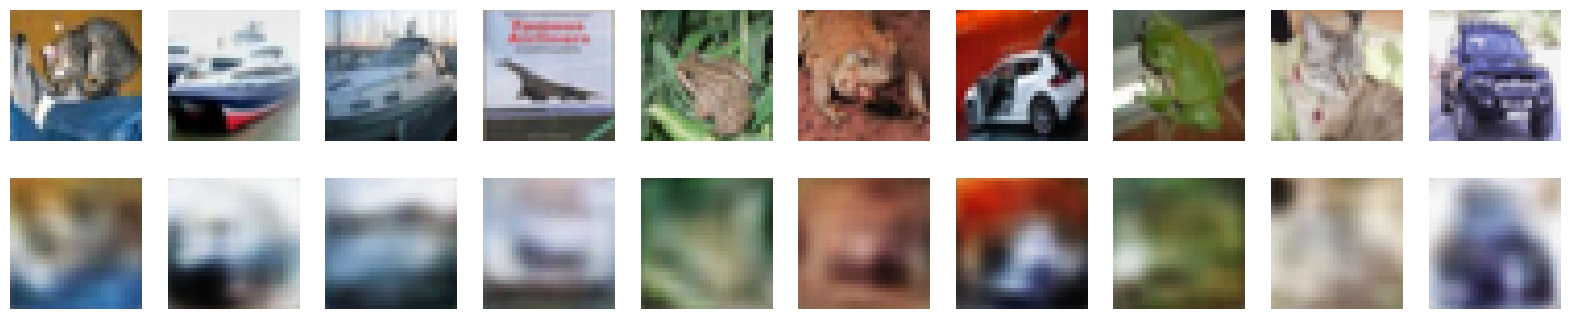

In [10]:
n = 10  # Show 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.axis('off')

plt.show()

In [11]:
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad']

for opt in optimizers:
    print(f"\nTraining with optimizer: {opt}")
    autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
    autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, validation_data=(x_test, x_test))



Training with optimizer: adam
Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 74s 359ms/step - loss: 0.6147 - val_loss: 0.5746
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 351ms/step - loss: 0.5732 - val_loss: 0.5736
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 355ms/step - loss: 0.5723 - val_loss: 0.5735
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 65s 333ms/step - loss: 0.5726 - val_loss: 0.5737
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 68s 347ms/step - loss: 0.5724 - val_loss: 0.5726

Training with optimizer: sgd
Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 68s 342ms/step - loss: 0.5715 - val_loss: 0.5726
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 356ms/step - loss: 0.5717 - val_loss: 0.5726
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 357ms/step - loss: 0.5717 - val_loss: 0.5725
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 71s 362ms/step - loss: 0.5712 - val_loss: 0.5725
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 71s 362ms/step - loss: 0.5722 - val_loss: 0.5725

Training with optimizer: rmsprop
Epoch 1/5
196/196 ━━━━━━━